In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.distributions import Normal
from torch.autograd import Variable
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
%config InlineBackend.figure_format = 'retina'

In [2]:
batch_size = 128

In [3]:
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('data', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0,), (1,)),
                       torch.flatten
                   ])), batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('data', train=False, transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0,), (1,)),
                       torch.flatten
                   ])), batch_size=batch_size, shuffle=True)

In [4]:
class Classifier_MLP(nn.Module):
    def __init__(self, in_dim, hidden_dim, out_dim):
        super().__init__()
        self.h1  = nn.Linear(in_dim, hidden_dim)
        self.h2  = nn.Linear(hidden_dim, hidden_dim)
        self.out = nn.Linear(hidden_dim, out_dim)
        self.out_dim = out_dim

    def forward(self, x):
        x = F.relu(self.h1(x))
        x = F.relu(self.h2(x))
        x = F.log_softmax(self.out(x))
        return x

In [5]:
input_size    = 784   # The image size = 28 x 28 = 784
hidden_size   = 400   # The number of nodes at the hidden layer
num_classes   = 10    # The number of output classes. In this case, from 0 to 9
learning_rate = 1e-3  # The speed of convergence

MLP = Classifier_MLP(in_dim=input_size, hidden_dim=hidden_size, out_dim=num_classes)

device=torch.device('cuda')
MLP=MLP.to(device)

optimizer = torch.optim.SGD(MLP.parameters(), lr=learning_rate)

In [6]:
epochs = 600
ACC_re=[]
for epoch in range(epochs):  # loop over the dataset multiple times
    for batch, (x_train, y_train) in enumerate(train_loader):
        
        x_train=Variable(x_train).cuda()
        y_train=Variable(y_train).cuda()
        
        optimizer.zero_grad()
        pred = MLP(x_train)
        loss = F.nll_loss(pred, y_train)
        loss.backward()
        optimizer.step()

    learning_rate /= 1.1
    test_losses, test_accs = [], []
    for i, (x_test, y_test) in enumerate(test_loader):
        
        x_test=Variable(x_test).cuda()
        y_test=Variable(y_test).cuda()
        
        optimizer.zero_grad()
        pred = MLP(x_test)
        loss = F.nll_loss(pred, y_test)
        
        loss=loss.cpu()
        pred=pred.cpu()
        y_test=y_test.cpu()
        
        acc = (pred.argmax(dim=-1) == y_test).to(torch.float32).mean()
#         print(i,acc)
        test_losses.append(loss.item())
        test_accs.append(acc.item())
    print(epoch,':','Loss: {}, Accuracy: {}'.format(np.mean(test_losses), np.mean(test_accs)))
    ACC_re.append(np.mean(test_accs))
print('Finished Training')

E:\Anaconda\envs\pytorch_cuda\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  if sys.path[0] == '':


0 : Loss: 2.2838787459119967, Accuracy: 0.16455696202531644
1 : Loss: 2.2642301426658147, Accuracy: 0.34632120253164556
2 : Loss: 2.2408338498465623, Accuracy: 0.5077136075949367
3 : Loss: 2.2108280085310152, Accuracy: 0.6007713607594937
4 : Loss: 2.172131544427027, Accuracy: 0.6465585443037974
5 : Loss: 2.1204467393174955, Accuracy: 0.6618868670886076
6 : Loss: 2.053083896636963, Accuracy: 0.6714794303797469
7 : Loss: 1.9634590993953656, Accuracy: 0.682060917721519
8 : Loss: 1.848175905927827, Accuracy: 0.6933346518987342
9 : Loss: 1.7075785519201545, Accuracy: 0.7063884493670886
10 : Loss: 1.5519856169253965, Accuracy: 0.7174643987341772
11 : Loss: 1.38908768907378, Accuracy: 0.7341772151898734
12 : Loss: 1.2383743237845506, Accuracy: 0.7553401898734177
13 : Loss: 1.1103659053392048, Accuracy: 0.7764042721518988
14 : Loss: 1.0006838463529755, Accuracy: 0.7931170886075949
15 : Loss: 0.9152931095678595, Accuracy: 0.8028085443037974
16 : Loss: 0.8404476740692235, Accuracy: 0.81220332278

136 : Loss: 0.24949229008789303, Accuracy: 0.9300830696202531
137 : Loss: 0.2463500228109239, Accuracy: 0.9306764240506329
138 : Loss: 0.24488345609058307, Accuracy: 0.931368670886076
139 : Loss: 0.2425631703455237, Accuracy: 0.9318631329113924
140 : Loss: 0.24251575277575962, Accuracy: 0.9315664556962026
141 : Loss: 0.24457588546638248, Accuracy: 0.9306764240506329
142 : Loss: 0.24042427143718623, Accuracy: 0.9324564873417721
143 : Loss: 0.24054916617991048, Accuracy: 0.9317642405063291
144 : Loss: 0.23842676606359361, Accuracy: 0.9325553797468354
145 : Loss: 0.23860549964482272, Accuracy: 0.9319620253164557
146 : Loss: 0.24128620741488058, Accuracy: 0.931368670886076
147 : Loss: 0.23685973269652716, Accuracy: 0.9331487341772152
148 : Loss: 0.23658910865270638, Accuracy: 0.9332476265822784
149 : Loss: 0.23677539325590374, Accuracy: 0.9323575949367089
150 : Loss: 0.23500231002705008, Accuracy: 0.9342365506329114
151 : Loss: 0.23464399396995955, Accuracy: 0.9336431962025317
152 : Loss: 

269 : Loss: 0.16889472447241408, Accuracy: 0.9519382911392406
270 : Loss: 0.16857390445244463, Accuracy: 0.9525316455696202
271 : Loss: 0.17015743859206575, Accuracy: 0.9521360759493671
272 : Loss: 0.16962019519149502, Accuracy: 0.9520371835443038
273 : Loss: 0.17129286746435526, Accuracy: 0.9519382911392406
274 : Loss: 0.16874581565962563, Accuracy: 0.9520371835443038
275 : Loss: 0.1717316688898998, Accuracy: 0.951443829113924
276 : Loss: 0.1695917608994472, Accuracy: 0.9512460443037974
277 : Loss: 0.16578035485706752, Accuracy: 0.953125
278 : Loss: 0.17192427997913542, Accuracy: 0.9520371835443038
279 : Loss: 0.16587293855374372, Accuracy: 0.9525316455696202
280 : Loss: 0.16471689043543006, Accuracy: 0.9529272151898734
281 : Loss: 0.16467318023684657, Accuracy: 0.9533227848101266
282 : Loss: 0.16543144671411453, Accuracy: 0.9516416139240507
283 : Loss: 0.1634868237225315, Accuracy: 0.9537183544303798
284 : Loss: 0.16483058459773847, Accuracy: 0.9525316455696202
285 : Loss: 0.16433545

403 : Loss: 0.1313753542549248, Accuracy: 0.961629746835443
404 : Loss: 0.12907352406955971, Accuracy: 0.962618670886076
405 : Loss: 0.12984687311551238, Accuracy: 0.9628164556962026
406 : Loss: 0.12996331805103942, Accuracy: 0.9619264240506329
407 : Loss: 0.12837258863109577, Accuracy: 0.9635087025316456
408 : Loss: 0.1398991695310496, Accuracy: 0.9609375
409 : Loss: 0.12793624481257004, Accuracy: 0.9636075949367089
410 : Loss: 0.12901439692212058, Accuracy: 0.9635087025316456
411 : Loss: 0.1285126932625529, Accuracy: 0.9636075949367089
412 : Loss: 0.12724366373842275, Accuracy: 0.9637064873417721
413 : Loss: 0.12733978429172613, Accuracy: 0.9642009493670886
414 : Loss: 0.12910465207658237, Accuracy: 0.9632120253164557
415 : Loss: 0.1272146607973153, Accuracy: 0.9639042721518988
416 : Loss: 0.1297541927499107, Accuracy: 0.962618670886076
417 : Loss: 0.12663516142888914, Accuracy: 0.9634098101265823
418 : Loss: 0.12583852384852456, Accuracy: 0.9638053797468354
419 : Loss: 0.13005368835

536 : Loss: 0.10956273034592218, Accuracy: 0.9668710443037974
537 : Loss: 0.10604593605746197, Accuracy: 0.968057753164557
538 : Loss: 0.10669299648909629, Accuracy: 0.968057753164557
539 : Loss: 0.10774222157801254, Accuracy: 0.9674643987341772
540 : Loss: 0.10618629872421675, Accuracy: 0.9677610759493671
541 : Loss: 0.10988645724763599, Accuracy: 0.9666732594936709
542 : Loss: 0.10543560887439342, Accuracy: 0.9682555379746836
543 : Loss: 0.10647888835283774, Accuracy: 0.9676621835443038
544 : Loss: 0.10737911984324455, Accuracy: 0.9678599683544303
545 : Loss: 0.10558914331884324, Accuracy: 0.9685522151898734
546 : Loss: 0.10663668188867689, Accuracy: 0.9669699367088608
547 : Loss: 0.1094633112602596, Accuracy: 0.9671677215189873
548 : Loss: 0.10477118557201157, Accuracy: 0.9685522151898734
549 : Loss: 0.10988137460773505, Accuracy: 0.9672666139240507
550 : Loss: 0.104328446797555, Accuracy: 0.9684533227848101
551 : Loss: 0.10476856145866309, Accuracy: 0.9683544303797469
552 : Loss: 0

In [8]:
len(ACC_re)

600

In [9]:
for name,parameters in MLP.named_parameters():
    print(name,':',parameters.size())

h1.weight : torch.Size([400, 784])
h1.bias : torch.Size([400])
h2.weight : torch.Size([400, 400])
h2.bias : torch.Size([400])
out.weight : torch.Size([10, 400])
out.bias : torch.Size([10])


In [11]:
A=[]
for name,parameters in MLP.named_parameters():
    A.append(parameters)

In [24]:
len(A[3])

400

In [12]:
C=[]
for i in range(len(A[0])):
    for j in range(len(A[0][1])):
            C.append(A[0][i][j].item())
            
for i in range(len(A[1])):
            C.append(A[1][i].item())
        
for i in range(len(A[2])):
    for j in range(len(A[2][1])):
            C.append(A[2][i][j].item())
            
for i in range(len(A[3])):
            C.append(A[3][i].item())
        
for i in range(len(A[4])):
    for j in range(len(A[4][1])):
            C.append(A[4][i][j].item())
            
for i in range(len(A[5])):
            C.append(A[5][i].item())

In [13]:
len(C)

478410

E:\Anaconda\envs\pytorch_cuda\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


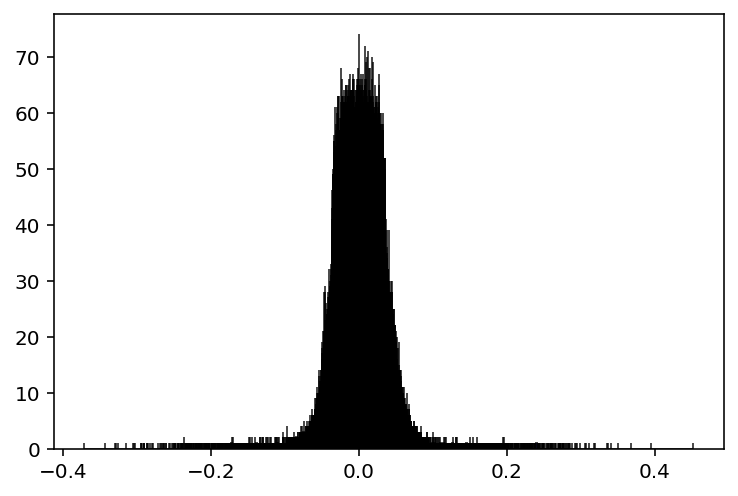

In [14]:
plt.hist(C, bins=100000, normed=0, facecolor="blue", edgecolor="black", alpha=0.7)
plt.show()

Dropout

In [4]:
class Classifier_MLP_dropout(nn.Module):
    def __init__(self, in_dim, hidden_dim, out_dim):
        super().__init__()
        self.h1  = nn.Linear(in_dim, hidden_dim)
        self.drop1 = nn.Dropout(0.6)
        self.h2  = nn.Linear(hidden_dim, hidden_dim)
        self.drop2 = nn.Dropout(0.6)
        self.out = nn.Linear(hidden_dim, out_dim)
        self.out_dim = out_dim

    def forward(self, x):
        x = F.relu(self.drop1(self.h1(x)))
        x = F.relu(self.drop2(self.h2(x)))
        x = F.log_softmax(self.out(x))
        return x

In [26]:
input_size    = 784   # The image size = 28 x 28 = 784
hidden_size   = 400   # The number of nodes at the hidden layer
num_classes   = 10    # The number of output classes. In this case, from 0 to 9
learning_rate = 1e-3  # The speed of convergence

MLP1 = Classifier_MLP_dropout(in_dim=input_size, hidden_dim=hidden_size, out_dim=num_classes)

device=torch.device('cuda')
MLP1=MLP1.to(device)

optimizer = torch.optim.SGD(MLP1.parameters(), lr=learning_rate)

In [27]:
epochs = 600
ACC_re1=[]
for epoch in range(epochs):  # loop over the dataset multiple times
    for batch, (x_train, y_train) in enumerate(train_loader):
        
        x_train=Variable(x_train).cuda()
        y_train=Variable(y_train).cuda()
        
        optimizer.zero_grad()
        pred = MLP1(x_train)
        loss = F.nll_loss(pred, y_train)
        loss.backward()
        optimizer.step()

    learning_rate /= 1.1
    test_losses, test_accs = [], []
    for i, (x_test, y_test) in enumerate(test_loader):
        
        x_test=Variable(x_test).cuda()
        y_test=Variable(y_test).cuda()
        
        optimizer.zero_grad()
        pred = MLP1(x_test)
        loss = F.nll_loss(pred, y_test)
        
        loss=loss.cpu()
        pred=pred.cpu()
        y_test=y_test.cpu()
        
        acc = (pred.argmax(dim=-1) == y_test).to(torch.float32).mean()
#         print(i,acc)
        test_losses.append(loss.item())
        test_accs.append(acc.item())
    print(epoch,':','Loss: {}, Accuracy: {}'.format(np.mean(test_losses), np.mean(test_accs)))
    ACC_re1.append(np.mean(test_accs))
print('Finished Training')

E:\Anaconda\envs\pytorch_cuda\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  


0 : Loss: 2.2891285268566275, Accuracy: 0.1294501582278481
1 : Loss: 2.2704674231855173, Accuracy: 0.1776107594936709
2 : Loss: 2.2516056314299377, Accuracy: 0.22290348101265822
3 : Loss: 2.2309255509436885, Accuracy: 0.27264636075949367
4 : Loss: 2.203120542477958, Accuracy: 0.3130933544303797
5 : Loss: 2.1666771792158297, Accuracy: 0.36550632911392406
6 : Loss: 2.12670376632787, Accuracy: 0.39823971518987344
7 : Loss: 2.0743688571302195, Accuracy: 0.4345332278481013
8 : Loss: 2.0041482720193984, Accuracy: 0.4756724683544304
9 : Loss: 1.9202254738988755, Accuracy: 0.5043512658227848
10 : Loss: 1.8243195346639127, Accuracy: 0.5239319620253164
11 : Loss: 1.723876088480406, Accuracy: 0.5408425632911392
12 : Loss: 1.6107506118243253, Accuracy: 0.5684335443037974
13 : Loss: 1.4893333926985535, Accuracy: 0.5902887658227848
14 : Loss: 1.3918319729310047, Accuracy: 0.6019580696202531
15 : Loss: 1.2986145849469342, Accuracy: 0.6204509493670886
16 : Loss: 1.2147887356673615, Accuracy: 0.6485363

137 : Loss: 0.3322190810230714, Accuracy: 0.9019976265822784
138 : Loss: 0.32637100298947924, Accuracy: 0.9037776898734177
139 : Loss: 0.3234215154300762, Accuracy: 0.9026898734177216
140 : Loss: 0.32678544219536115, Accuracy: 0.9035799050632911
141 : Loss: 0.32408714464193655, Accuracy: 0.9061511075949367
142 : Loss: 0.3139923763803289, Accuracy: 0.9064477848101266
143 : Loss: 0.330021755416182, Accuracy: 0.9028876582278481
144 : Loss: 0.31992827902866317, Accuracy: 0.9083267405063291
145 : Loss: 0.316905242355564, Accuracy: 0.9052610759493671
146 : Loss: 0.31501406997065, Accuracy: 0.9073378164556962
147 : Loss: 0.3113567597126659, Accuracy: 0.9113924050632911
148 : Loss: 0.3186686189868782, Accuracy: 0.9083267405063291
149 : Loss: 0.3233205545929414, Accuracy: 0.9105023734177216
150 : Loss: 0.3212324518568908, Accuracy: 0.9046677215189873
151 : Loss: 0.31117930536783195, Accuracy: 0.9072389240506329
152 : Loss: 0.3129755330236652, Accuracy: 0.9075356012658228
153 : Loss: 0.320841031

272 : Loss: 0.23302167654037476, Accuracy: 0.9296875
273 : Loss: 0.2319753150208087, Accuracy: 0.9336431962025317
274 : Loss: 0.22741800197694875, Accuracy: 0.9328520569620253
275 : Loss: 0.23133535673723946, Accuracy: 0.9338409810126582
276 : Loss: 0.2303022638529162, Accuracy: 0.9325553797468354
277 : Loss: 0.2256921252495126, Accuracy: 0.932060917721519
278 : Loss: 0.22133922256246397, Accuracy: 0.9339398734177216
279 : Loss: 0.23076551549042326, Accuracy: 0.9323575949367089
280 : Loss: 0.22366621694232844, Accuracy: 0.9347310126582279
281 : Loss: 0.2267632298643076, Accuracy: 0.9323575949367089
282 : Loss: 0.22727786664721333, Accuracy: 0.9341376582278481
283 : Loss: 0.22656256960162632, Accuracy: 0.9349287974683544
284 : Loss: 0.22834018042570428, Accuracy: 0.9307753164556962
285 : Loss: 0.22766796395748476, Accuracy: 0.9324564873417721
286 : Loss: 0.22475799173116684, Accuracy: 0.9335443037974683
287 : Loss: 0.22354416718965844, Accuracy: 0.9322587025316456
288 : Loss: 0.22789212

406 : Loss: 0.1934499885839752, Accuracy: 0.9445213607594937
407 : Loss: 0.19337472621398635, Accuracy: 0.9430379746835443
408 : Loss: 0.19116394184058225, Accuracy: 0.9457080696202531
409 : Loss: 0.18345028944785083, Accuracy: 0.9465981012658228
410 : Loss: 0.19181170993590657, Accuracy: 0.9447191455696202
411 : Loss: 0.18496136405045474, Accuracy: 0.9439280063291139
412 : Loss: 0.19200073201445084, Accuracy: 0.9409612341772152
413 : Loss: 0.18707498398762715, Accuracy: 0.9448180379746836
414 : Loss: 0.18828858227669437, Accuracy: 0.9437302215189873
415 : Loss: 0.18315056768022006, Accuracy: 0.9452136075949367
416 : Loss: 0.19130072422042677, Accuracy: 0.9445213607594937
417 : Loss: 0.18297176374287544, Accuracy: 0.9475870253164557
418 : Loss: 0.19337502442583254, Accuracy: 0.9420490506329114
419 : Loss: 0.1838683429398114, Accuracy: 0.9451147151898734
420 : Loss: 0.18741551333967643, Accuracy: 0.9427412974683544
421 : Loss: 0.18439429413668718, Accuracy: 0.9468947784810127
422 : Loss

540 : Loss: 0.16419104477272758, Accuracy: 0.951443829113924
541 : Loss: 0.16051230221232282, Accuracy: 0.9533227848101266
542 : Loss: 0.16815910054535804, Accuracy: 0.9496637658227848
543 : Loss: 0.1596878686849075, Accuracy: 0.9528283227848101
544 : Loss: 0.15982657581379142, Accuracy: 0.9525316455696202
545 : Loss: 0.16410272521308705, Accuracy: 0.9522349683544303
546 : Loss: 0.1617404510137401, Accuracy: 0.9540150316455697
547 : Loss: 0.16260974095026148, Accuracy: 0.9533227848101266
548 : Loss: 0.166469547378866, Accuracy: 0.9491693037974683
549 : Loss: 0.15814652586285072, Accuracy: 0.9510482594936709
550 : Loss: 0.1631571113403085, Accuracy: 0.9527294303797469
551 : Loss: 0.16779032641951042, Accuracy: 0.951443829113924
552 : Loss: 0.16263328667117072, Accuracy: 0.9533227848101266
553 : Loss: 0.16087738103881666, Accuracy: 0.9540150316455697
554 : Loss: 0.15672230333844317, Accuracy: 0.9545094936708861
555 : Loss: 0.16184013549096976, Accuracy: 0.953817246835443
556 : Loss: 0.16

In [32]:
for name,parameters in MLP1.named_parameters():
    print(name,':',parameters.size())

h1.weight : torch.Size([400, 784])
h1.bias : torch.Size([400])
h2.weight : torch.Size([400, 400])
h2.bias : torch.Size([400])
out.weight : torch.Size([10, 400])
out.bias : torch.Size([10])


In [33]:
A1=[]
for name,parameters in MLP1.named_parameters():
    A1.append(parameters)

In [34]:
C1=[]
for i in range(len(A1[0])):
    for j in range(len(A1[0][1])):
            C1.append(A1[0][i][j].item())
            
for i in range(len(A1[1])):
            C1.append(A1[1][i].item())
        
for i in range(len(A1[2])):
    for j in range(len(A1[2][1])):
            C1.append(A1[2][i][j].item())
            
for i in range(len(A1[3])):
            C1.append(A1[3][i].item())
        
for i in range(len(A1[4])):
    for j in range(len(A1[4][1])):
            C1.append(A1[4][i][j].item())
            
for i in range(len(A1[5])):
            C1.append(A1[5][i].item())

E:\Anaconda\envs\pytorch_cuda\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


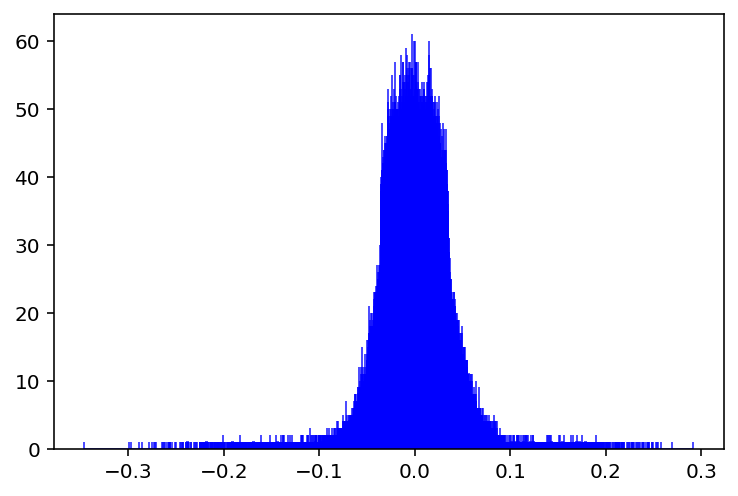

In [35]:
plt.hist(C1, bins=100000, normed=0, facecolor="blue", edgecolor="blue", alpha=0.7)
plt.show()

In [36]:
ACC_=[]
for i in range(len(ACC_re)):
    ACC_.append(1-ACC_re[i])

In [37]:
ACC_1=[]
for i in range(len(ACC_re1)):
    ACC_1.append(1-ACC_re1[i])

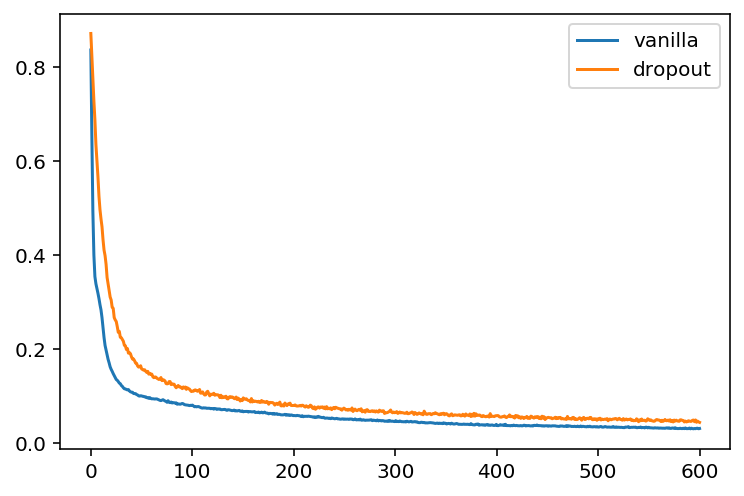

In [39]:
x = torch.linspace(0,600,600).reshape(-1,1)
plt.plot(x.numpy(),ACC_,label = 'vanilla')
plt.plot(x.numpy(),ACC_1,label = 'dropout')

plt.legend()
plt.show()